In [2]:


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
data=pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")
data.head()

/kaggle/input/california-housing-prices/housing.csv


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.shape

(20640, 10)

In [4]:
data.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
data=data.dropna()
# or data=data.dropna(subset='col')

In [6]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [7]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [8]:
data["ocean_proximity"]=data["ocean_proximity"].astype('string')

In [9]:
data.dtypes

longitude                    float64
latitude                     float64
housing_median_age           float64
total_rooms                  float64
total_bedrooms               float64
population                   float64
households                   float64
median_income                float64
median_house_value           float64
ocean_proximity       string[python]
dtype: object

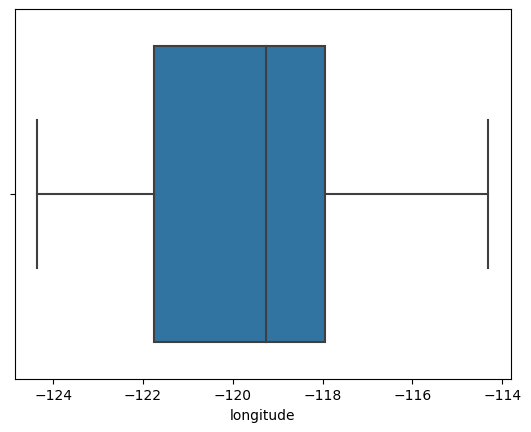

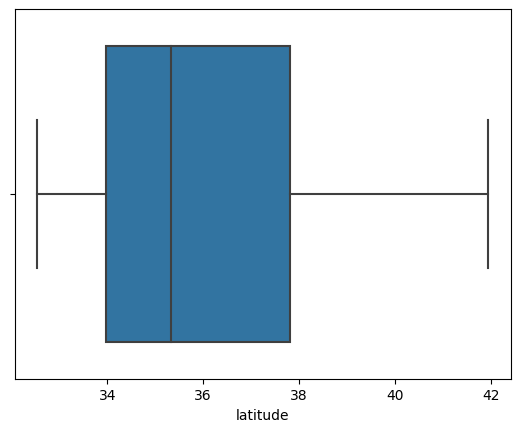

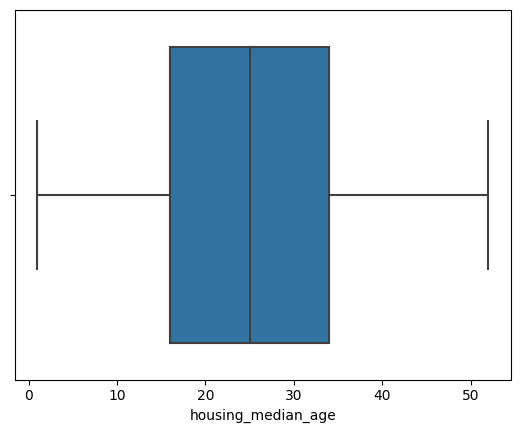

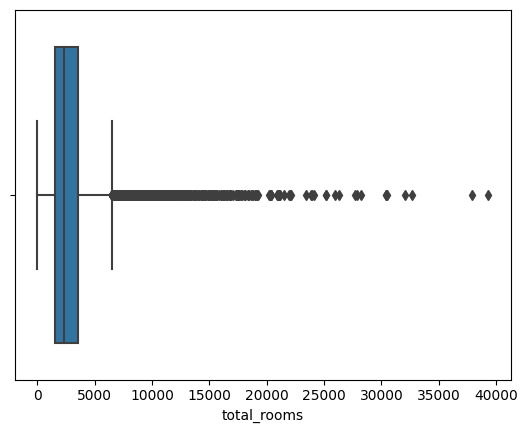

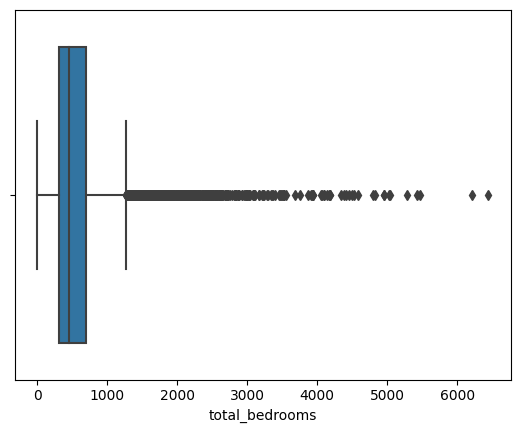

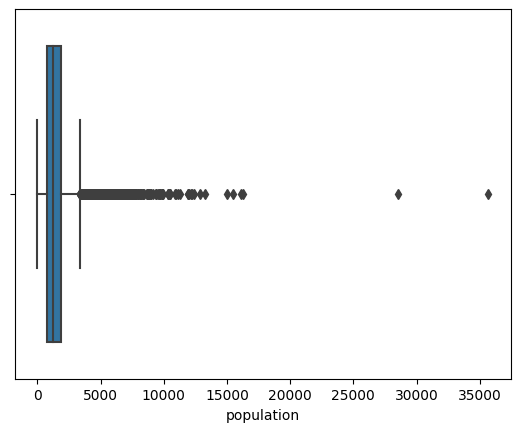

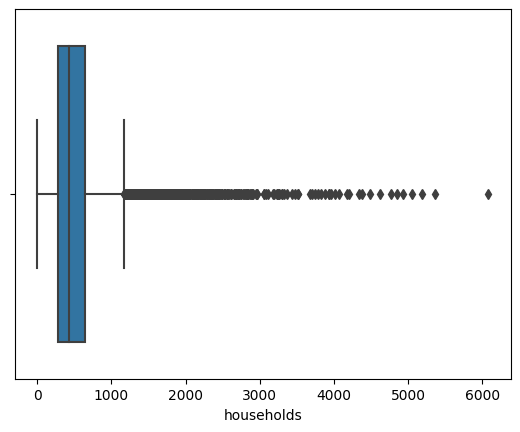

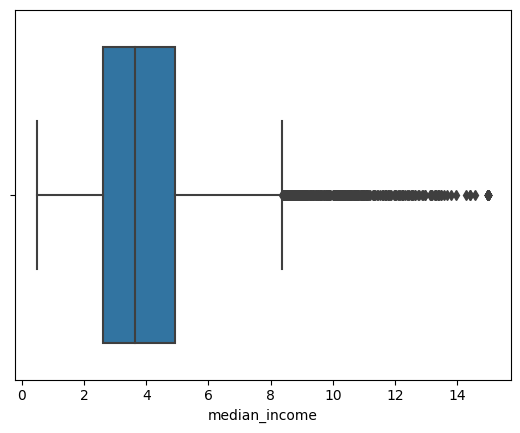

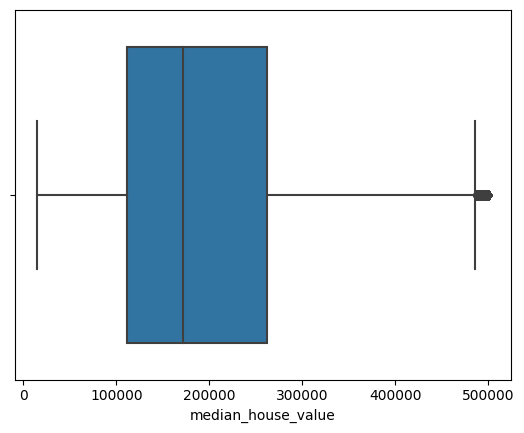

In [19]:
for i in data.select_dtypes(include='number').columns:
    sb.boxplot(data, x=i)
    plt.show()

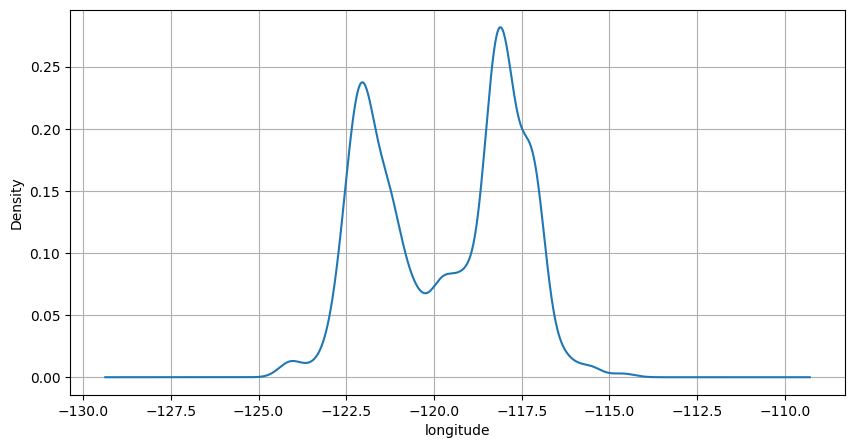

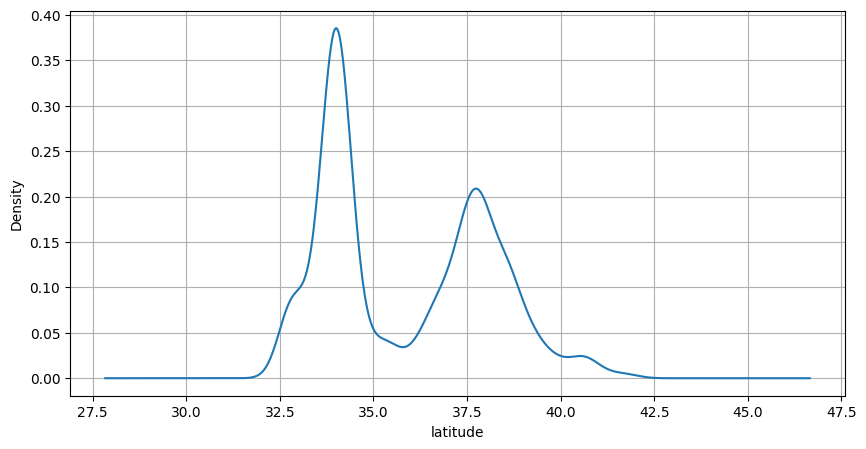

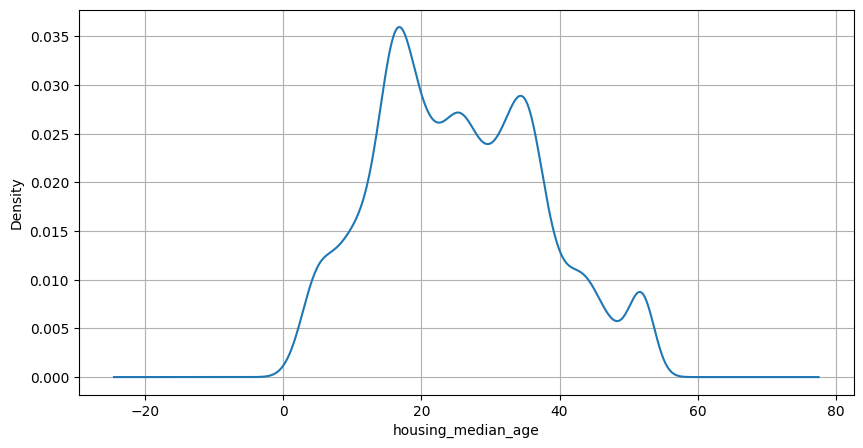

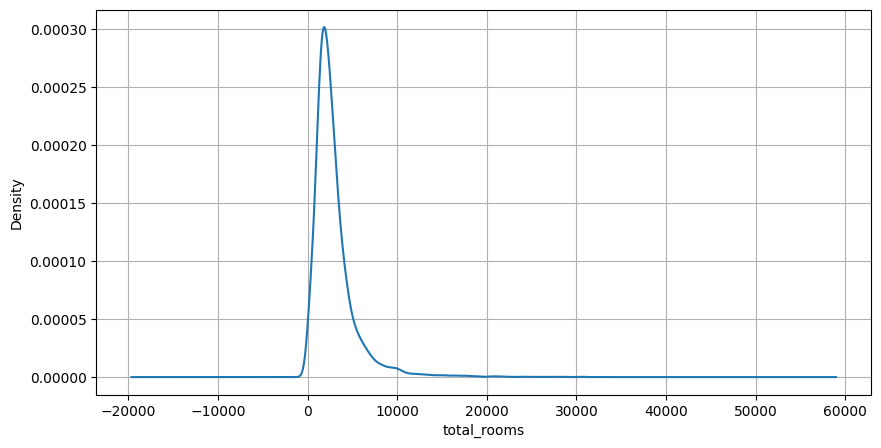

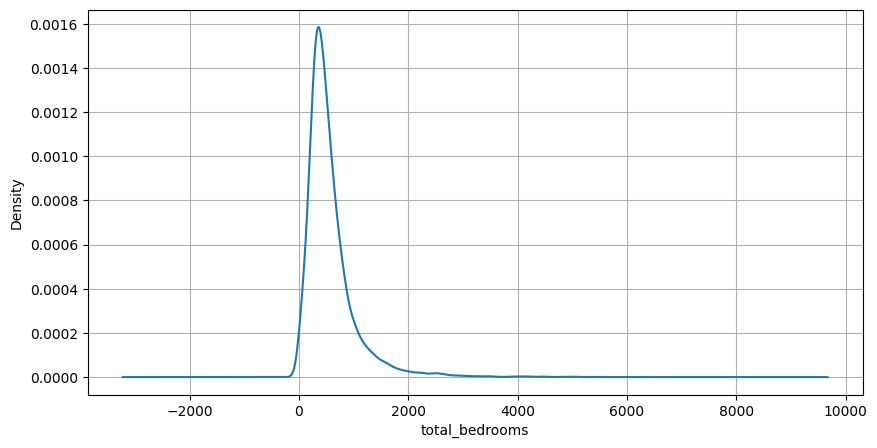

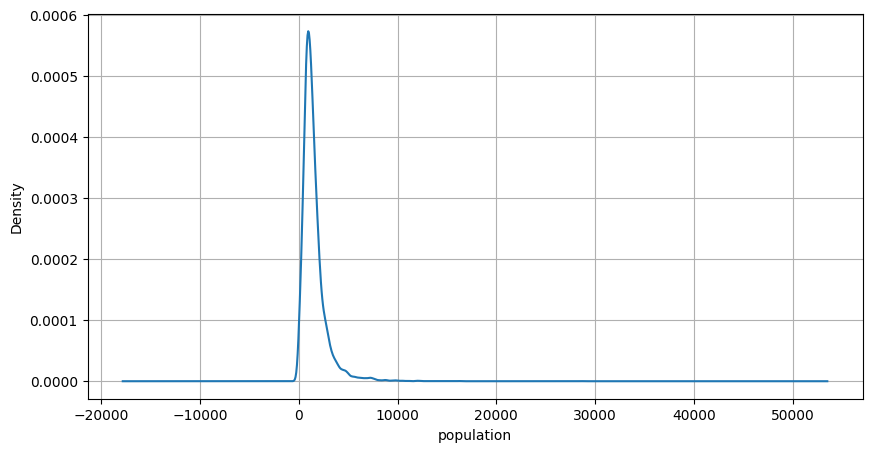

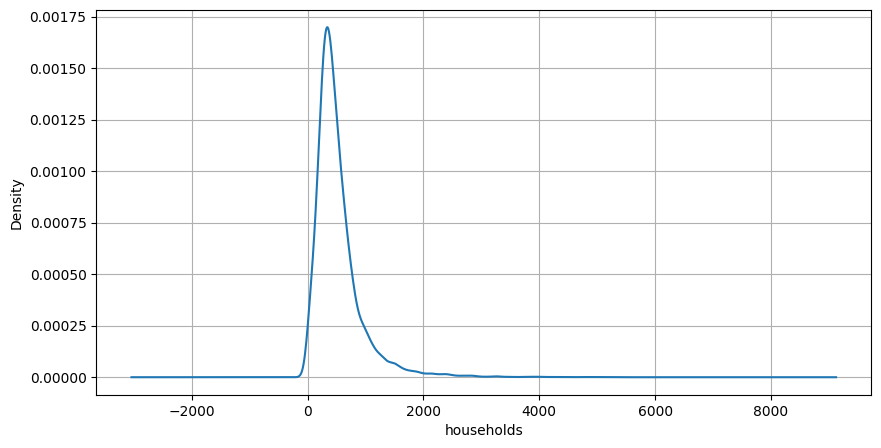

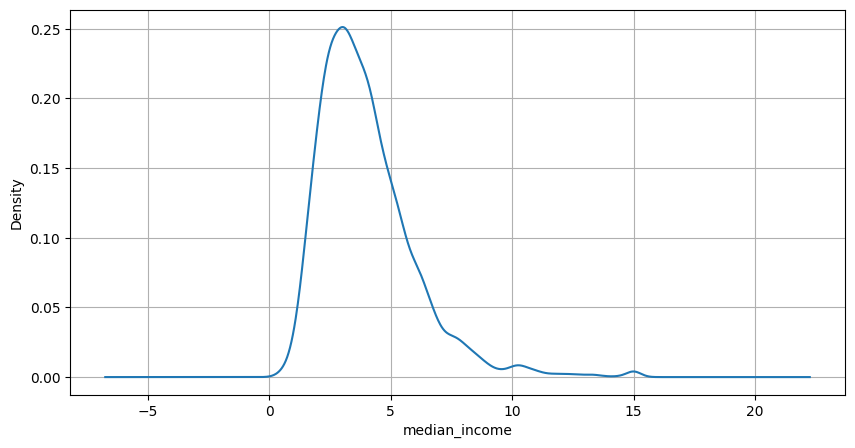

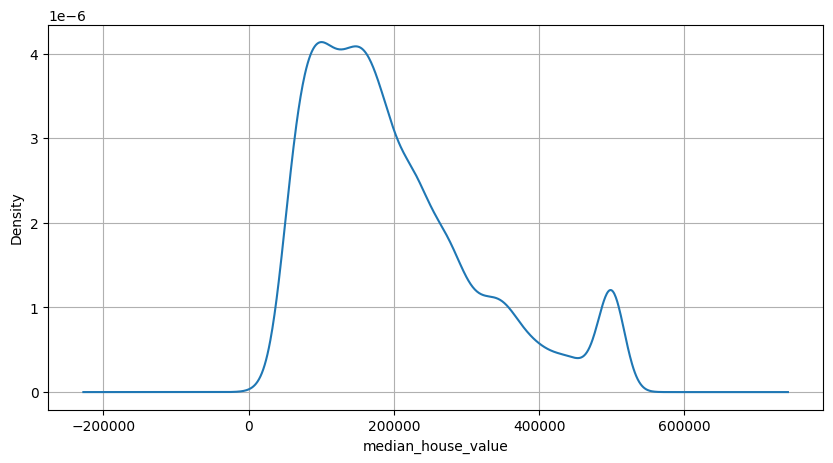

In [31]:
for i in data.select_dtypes(include='number').columns:
    data[i].plot(kind='kde',grid=True , figsize=(10,5))
    plt.xlabel(i)
    plt.show()

In [10]:

data = data.loc[~data.duplicated(subset=['longitude','latitude'])]

In [11]:

data.shape

(12507, 10)

<Axes: xlabel='population', ylabel='median_house_value'>

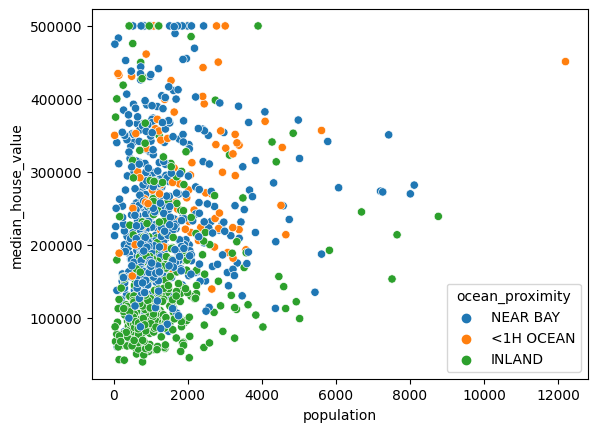

In [12]:
sb.scatterplot(data[0:1000], x='population', y='median_house_value', hue='ocean_proximity')

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

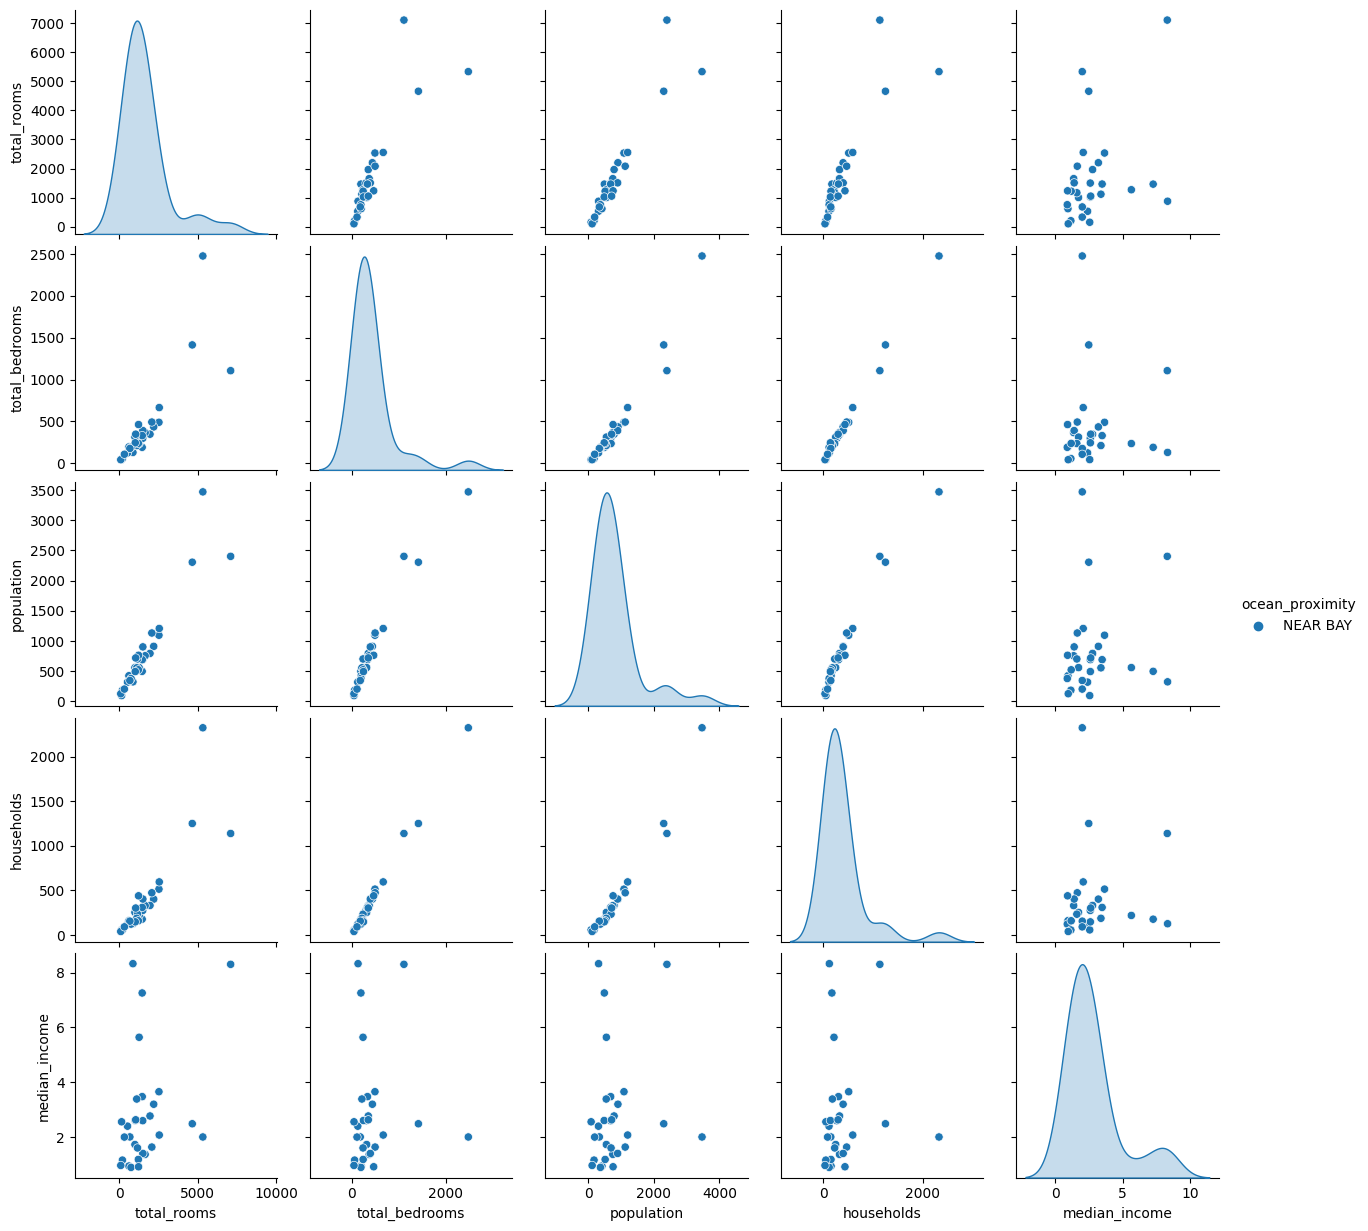

In [14]:
sb.pairplot(data.head(30), vars=['total_rooms','total_bedrooms', 'population', 'households', 'median_income'], hue='ocean_proximity')
plt.show()

In [15]:
data_corr=data[['total_rooms','total_bedrooms', 'population', 'households', 'median_income']].dropna().corr()
data_corr

,total_rooms,total_bedrooms,population,households,median_income
total_rooms,1.000000,0.947467,0.877285,0.934200,0.196703
total_bedrooms,0.947467,1.000000,0.885450,0.976119,0.020112
population,0.877285,0.885450,1.000000,0.919648,0.042025
households,0.934200,0.976119,0.919648,1.000000,0.044482
median_income,0.196703,0.020112,0.042025,0.044482,1.000000


<Axes: >

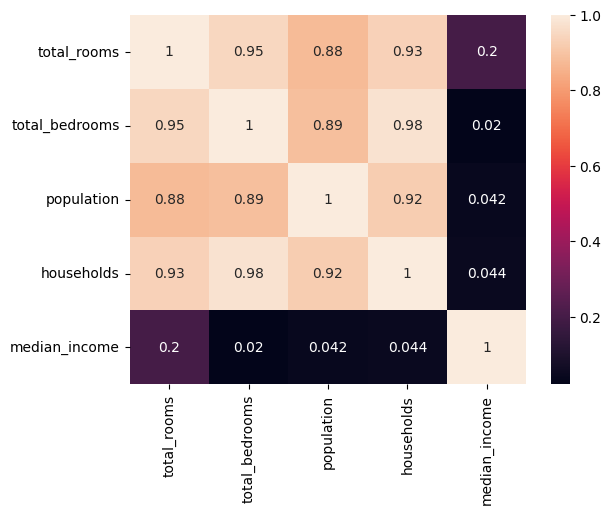

In [16]:
sb.heatmap(data_corr, annot=True)